In [8]:
import qiskit as q
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
%matplotlib inline

In [10]:
statevector_simulator = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend("qasm_simulator")

def do_job(circuit):
    result = q.execute(circuit, backend=statevector_simulator).result()
    state_vec = result.get_statevector()
    n_qubits = circuit.n_qubits
    # The first parameter is the quantum computer running it, the second is the classical computer running it
    circuit.measure([i for i in range(n_qubits)], [i for i in range(len(circuit.clbits))])
    qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
    counts = qasm_job.get_counts()
    return state_vec, counts

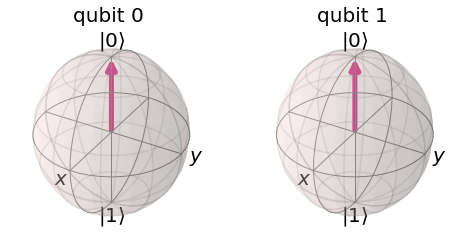

In [11]:
circuit = q.QuantumCircuit(2, 2) # 2 qubits, 2 normal bits
state_vec, counts = do_job(circuit)
plot_bloch_multivector(state_vec)

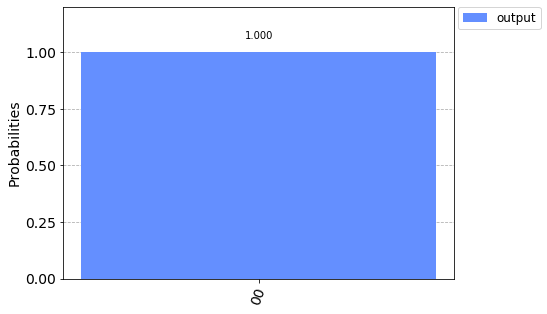

In [13]:
plot_histogram([counts], legend=["output"])

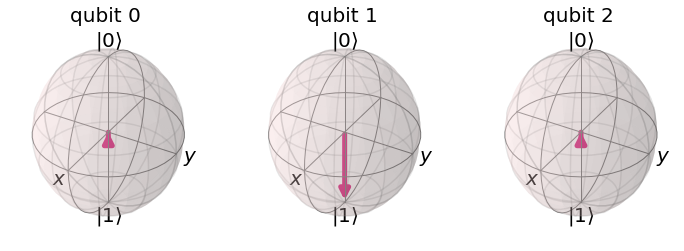

In [22]:
circuit = q.QuantumCircuit(3, 3) # 2 qubits, 2 normal bits
circuit.h(0)
circuit.x(1)
circuit.cx(0, 2)
state_vec, counts = do_job(circuit)
plot_bloch_multivector(state_vec)

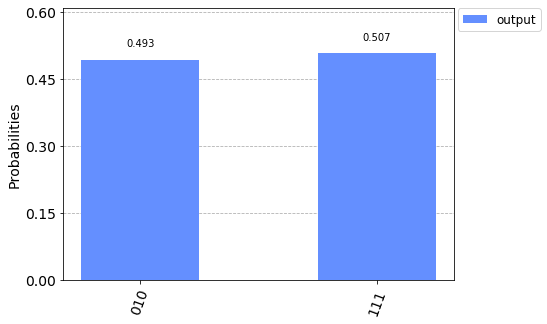

In [23]:
plot_histogram([counts], legend=['output'])

In [26]:
circuit = q.QuantumCircuit(3, 3) # 3 qubits, 3 normal bits
circuit.h(0)
circuit.h(1)
circuit.ccx(0, 1, 2)
circuit.draw()

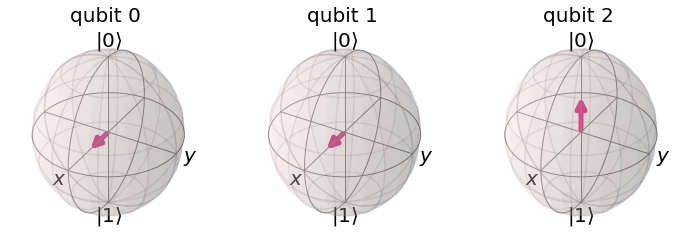

In [27]:
state_vec, counts = do_job(circuit)
plot_bloch_multivector(state_vec)

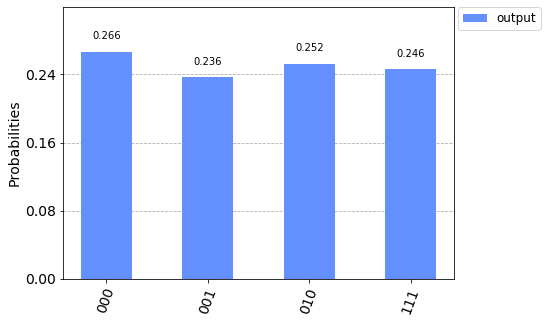

In [28]:
plot_histogram([counts], legend=['output'])

In [33]:
circuit = q.QuantumCircuit(3, 1) # 3 qubits, 3 normal bits
circuit.h(0)
circuit.h(1)
circuit.ccx(0, 1, 2)
circuit.measure([2], [0])
circuit.draw()

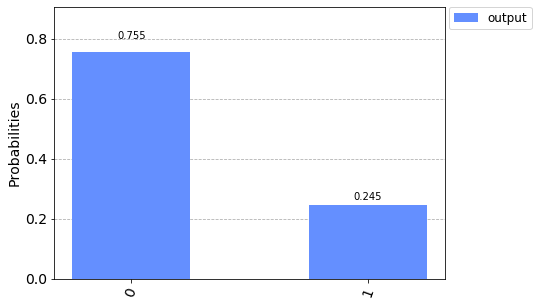

In [34]:
qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
counts = qasm_job.get_counts()
plot_histogram([counts], legend=['output'])

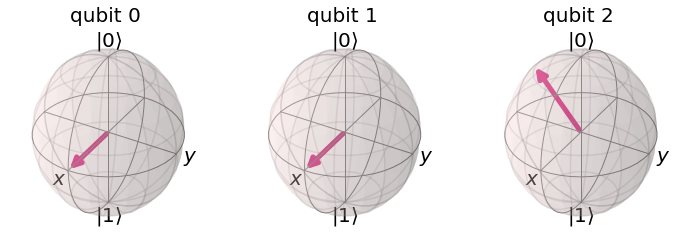

In [41]:
import math
circuit = q.QuantumCircuit(3, 3)
circuit.h(0) # hadamart
circuit.h(1)
circuit.rx(math.pi / 4, 2)
# circuit.x(2)
state_vec, counts = do_job(circuit)
plot_bloch_multivector(state_vec)

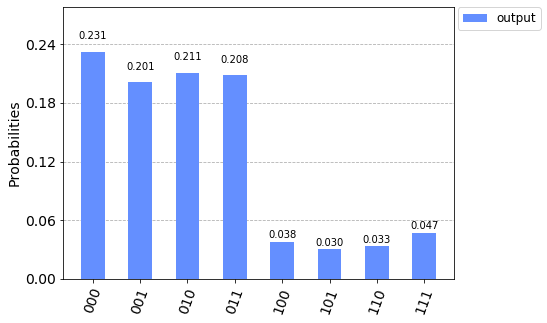

In [42]:
plot_histogram([counts], legend=['output'])

In [44]:
circuit = q.QuantumCircuit(3, 1)
circuit.h(0) # hadamart
circuit.h(1)
circuit.rx(math.pi / 4, 2)
circuit.measure([2], [0])
circuit.draw()

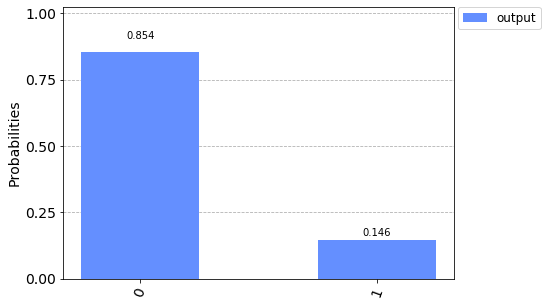

In [45]:
qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
counts = qasm_job.get_counts()
plot_histogram([counts], legend=['output'])